In [1]:
%load_ext autoreload
%autoreload 2

import sys
import numpy as np

In [2]:
%matplotlib --list

# import matplotlib
# import matplotlib.pyplot as mpl
# import matplotlib.ticker
# import matplotlib.cm as cm

import MPLGUI as MP
# %matplotlib inline

Available matplotlib backends: ['osx', 'qt4', 'qt5', 'gtk3', 'notebook', 'wx', 'qt', 'nbagg', 'gtk', 'tk', 'inline']


In [3]:
!pwd

/nfs/Data/Notebooks/Plotting


In [4]:
# Import Helpers
from Helpers.General import *

In [5]:
# Data loading example

DataFolder = './FigureData'
#DataFile = 'In Vitro - ContourData.npy'
DataFile = 'FracVsConc - Frac - Stacked.npy'
PlotData = np.load('{}/{}'.format(DataFolder, DataFile))

In [6]:
# Function Based Example

# Import Binding Funtions
from Helpers.OneToOne import *

# Setup Data for Plot
TimePoints = LogTimePoints(-3,4)

# Params
Kd  = 1e-7
A0  = 2e-6
B0  = 1e-6
kon = 1e6

# Generate Plot Data
OtO_A  = A_AB(Kd, A0, B0, kon, TimePoints)
OtO_B  = B(Kd, A0, B0, kon, TimePoints)
OtO_AB = AB(Kd, A0, B0, kon, TimePoints)

In [7]:
# Figure Settings
ImgFileName = 'Example_Line.pdf'
Title       = 'Example Title'
XAxisLabel  = 'X - Axis'
YAxisLabel  = 'Y - Axis'
XAxisPoints = TimePoints
XLim = [1e-3, 1e2]

XBounds = (XLim[0] <= XAxisPoints) & (XAxisPoints <= XLim[1])
XAxisPoints = XAxisPoints[XBounds]

/home/vatir/anaconda3/envs/DataViewer27/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/home/vatir/anaconda3/envs/DataViewer27/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'cursive'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


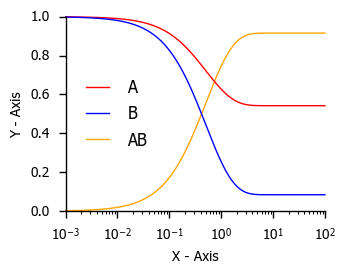

In [8]:
MainPlot = MP.LinePlot(
    Width="single",
    YAxisInPercent = False,
    )

MainPlot.AddLine(
    XAxisPoints,
    OtO_A[XBounds]/A0,
    label="A",
    color="red",
    clip_on=False,
#     alpha=0.5,
    zorder=1
    )
MainPlot.AddLine(
    XAxisPoints,
    OtO_B[XBounds]/B0,
    label="B",
    color="Blue",
    clip_on=False,
#     alpha=0.5,
    zorder=1
    )
MainPlot.AddLine(
    XAxisPoints,
    OtO_AB[XBounds]/np.min([A0,B0]),
    label="AB",
    color="Orange",
    clip_on=False,
#     alpha=0.5,
    zorder=0
    )

LegendAdjust = (15.0, -10.0)
MainPlot.AddLegend(
    loc = "best",
#     loc = "lower right",
#     loc = "upper right",
    labelspacing = 0.5
    )

MainPlot.SetXRange(XLim[0],XLim[1])


MainPlot.XLabel(XAxisLabel)
MainPlot.YLabel(YAxisLabel)

# MainPlot.ChangeYAxis(lambda x, p: format(x, '2.0e'))

MainPlot._MainFig.show()
MainPlot.SaveFig(ImgFileName,
                 bbox_inches = 'tight',
                 transparent=True
                )
MP.mpl.show()

In [9]:
# Figure Settings
Title       = "Yield of B"
ImgFileName = 'Contour-{}.pdf'.format(Title)
# XAxisLabel  = "[A{}] (M)".format(r"$\ \!_0$")
# YAxisLabel  = "[B{}] (M)".format(r"$\ \!_0$")
XAxisLabel  = r"$[A]_0\ (M)$"
YAxisLabel  = r"$[B]_0\ (M)$"

# XAxisLabel  = 'X - Axis'
# YAxisLabel  = 'Y - Axis'

PointCount = 5e2
XLim = [1e-9, 1e-3]
YLim = [1e-9, 1e-3]
XAxisPoints = np.logspace(np.log10(XLim[0]), np.log10(XLim[1]), PointCount)
YAxisPoints = np.logspace(np.log10(YLim[0]), np.log10(YLim[1]), PointCount)

In [10]:
# Function Based Example

# Import Binding Funtions
from Helpers.OneToOne import *

# Params
Kd  = 1e-6

# Generate Plot Data
A0 = XAxisPoints
B0 = YAxisPoints
ContourData = SS_B_AB(Kd, A0, B0, X_Y_Axes=("A0","B0"), Normalized = True)

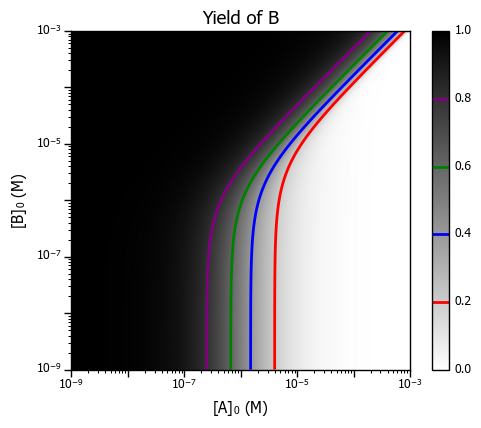

In [11]:
ZLim = [np.min(ContourData), np.max(ContourData)]

ContourLevels = [
        0.20,
        0.40,
        0.60,
        0.80,
#         0.60,
#         0.63,
#         0.65,
        ]

Settings = {"hpad": 0.3, "wpad": 0.3, "FontSize": 11, "ShowNormLine":False}
import matplotlib.gridspec as gridspec
gs1 = gridspec.GridSpec(nrows=2, ncols=2)#, left=0.05, right=0.48, wspace=0.05)

OverallMainPlot = MP.MPLGPU(
    Blank=True,
#     hpad=0.1,
#     wpad=0.1,
#     FontSize = FontSize,
    Width=MP.inches2mm(6.5),
    subplot=221,
#     axes_aspect="equal",
    Aspect=16.0/12.0,
    axes_aspect=16.0/12.0,
#     rasterized=True,
    **Settings
)
Width = MP.inches2mm(3.25)
FontSize = 11
Aspect=1.0
ShiftRight = 0.0
hpad=0.3
wpad=0.3
axes_aspect="equal"
ShiftRight = 0.025

MainPlot = MP.ContourPlot(
    Width=Width,
    PrimaryFig=OverallMainPlot._MainFig,
    subplot=gs1[0,0],
    Aspect=Aspect,
    hpad = hpad,
    wpad = wpad,
    axes_aspect=axes_aspect,
)

# MainPlot = MP.ContourPlot(
#     Width="single",
# #     latex = False
#     )

MainPlot.SetXRange(XLim[0],XLim[1])
MainPlot.SetYRange(YLim[0],YLim[1])

XTicks = MainPlot._Plot.xaxis.get_major_ticks()
YTicks = MainPlot._Plot.yaxis.get_major_ticks()

for Index in np.arange(0, len(XTicks),2):
    XTicks[Index].label1On = ""
    YTicks[Index].label1On = ""

ColorMap = MP.mpl.cm.gray_r
# ColorMap = cm.gray_r
ColorMap.set_bad('red',1.)

ContourImage = MainPlot._Plot.pcolormesh(
    XAxisPoints,
    YAxisPoints,
    ContourData,
    cmap=ColorMap,
    shading = 'gouraud',
#     rasterized = True,
    vmin=ZLim[0],
    vmax=ZLim[1]
)

ContourImage.autoscale()

CLs = ContourLines =  MainPlot._Plot.contour(
    XAxisPoints,
    YAxisPoints,
    ContourData,
    ContourLevels,
    origin='lower',
    linewidths=2.0,
    colors=(
        'red',
        'blue',
        'green',
        'purple',
    )
)

# MainPlot._Plot.clabel(
#     ContourLines,
#     ContourLevels,
#     inline=True,
#     fmt='%.1f',
#     fontsize=7,
#     orientation='horizontal',
#     rightside_up = True,
#     inline_spacing = 30.0,
# )

Colorbar = MP.mpl.colorbar(
    ContourImage,
#     ticklocation = [],
    ticks = [ZLim[0],ZLim[1]]+ContourLevels,
    format = '%1.1f',
    drawedges = False,
    orientation = 'vertical',
#     shrink=0.8,
#     extend='neither'
)

# MainPlot._Plot.tick_params(
#         which = 'major',
#         pad = 1.5, # How far are the labels from the mark
#     )
MainPlot._Plot.tick_params(
        which = 'major',
        labelsize=FontSize*0.8,
        pad = 1.5, # How far are the labels from the mark
)

Colorbar.ax.tick_params(which='both',length=0, labelsize=FontSize*0.8)

# Colorbar.ax.tick_params(which='both',length=0)
# Colorbar.ax.set_xticks([ZLim[0],ZLim[1]]+ContourLevels)
Colorbar.add_lines(CLs)
# Colorbar.set_ticks(ContourLevels)
Colorbar.update_ticks()

Colorbar.ax.set_position(np.array(Colorbar.ax.get_position().bounds) + [ShiftRight,0.0,0,0])
MainPlot._Plot.set_position(np.array(MainPlot._Plot.get_position().bounds) + [ShiftRight,0.0,0,0])

MainPlot._Plot.set_title(Title)
MainPlot.XLabel(XAxisLabel)
MainPlot.YLabel(YAxisLabel)

MainPlot._MainFig.show()
MainPlot.SaveFig(ImgFileName,
                 bbox_inches = 'tight',
                 transparent=True
                )

# MainPlot.DisallowLatex()
MP.mpl.show()

In [12]:
from IPython.display import Markdown as md

md("matplotlib documentation for this version: https://matplotlib.org/{}/".format(MP.matplotlib.__version__))

matplotlib documentation for this version: https://matplotlib.org/1.5.3/

In [13]:
MP.FontInstance.get_name()

u'Tahoma'

In [14]:
MP.FontInstance.get_family()

[u'sans-serif']

In [15]:
MP.matplotlib.rcParams['text.usetex']

False